# Physical Activity Recognition using Accelerometer Data

In [1]:
#Load required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os
sns.set_style('darkgrid')
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Setup Complete')

Setup Complete


## 1. Data Preparation
### Data Retrieval
### Attribute Information:

Data are separated by participant. Each file contains the following information
sequential number, x acceleration, y acceleration, z acceleration, label.<br/>

Labels are codified by numbers:
* 1: Working at Computer
* 2: Standing Up, Walking and Going updown stairs
* 3: Standing
* 4: Walking
* 5: Going UpDown Stairs
* 6: Walking and Talking with Someone
* 7: Talking while Standing

In [2]:
def load_multiple_csv_into_one(path):
    #Use glob to create a list of all filenames
    all_files = glob.glob(os.path.join(path, "*.csv"))
    col_names = ['sequential_no','x-acceleration','y-acceleration','z-acceleration','label']
    #Read data from all csv
    data_from_each_file = (pd.read_csv(file,header=None,names=col_names) for file in all_files)
    #Concatenate 
    data   = pd.concat(data_from_each_file,axis=0)
    return data
def plot_confusion_matrix(y_test,y_pred):
    y_true = [i for i in range(1,8)]
    y_predicted = [i for i in range(1,8)]
    conf_data = confusion_matrix(y_test,y_pred,normalize='true')
    df_cm = pd.DataFrame(conf_data, columns=np.unique(y_true), index = np.unique(y_true))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, cmap="Blues",annot=True,square=True,annot_kws={"size": 16});# font size
def cross_validation(X,y):
    i=1 
    k_fold = StratifiedKFold(n_splits=5,random_state=40,shuffle=True) 
    print("Using Stratified K-Fold Cross Validation")
    for train_index,test_index in k_fold.split(X,y):
        print('\n{} of kfold {}'.format(i,k_fold.n_splits))
        x_train,x_val = X.loc[train_index],X.loc[test_index]  
        y_train,y_val = y[train_index],y[test_index]  
        model = KNeighborsClassifier(n_neighbors=13,p=4)  
        model.fit(x_train, y_train) 
        pred_test = model.predict(x_val) 
        test_score = accuracy_score(y_val,pred_test) 
        print('accuracy_score',test_score) 
        i+=1

In [3]:
path = "Activity Recognition from Single Chest-Mounted Accelerometer"
data = load_multiple_csv_into_one(path)

In [4]:
def inspect_data(df):
    #Check dtypes
    print('Data Types\n%s\n' %df.dtypes,'\n')
    #Check Missing values
    print('Missing values\n%s'%df.isna().sum(),'\n')
    #Impossible Values
    print(df['label'].value_counts())

In [5]:
inspect_data(data)
#Removing impossible values
data = data[data['label']!=0]
data.to_csv('preprocessed_data.csv',index=False)
print('Saved successfully to a new file')

Data Types
sequential_no     float64
x-acceleration      int64
y-acceleration      int64
z-acceleration      int64
label               int64
dtype: object
 

Missing values
sequential_no     0
x-acceleration    0
y-acceleration    0
z-acceleration    0
label             0
dtype: int64 

1    608667
7    593563
4    357064
3    216737
5     51498
2     47878
6     47770
0      3719
Name: label, dtype: int64
Saved successfully to a new file


## 2. Data Exploration

### Univariate Analysis

In [6]:
data = pd.read_csv('preprocessed_data.csv')

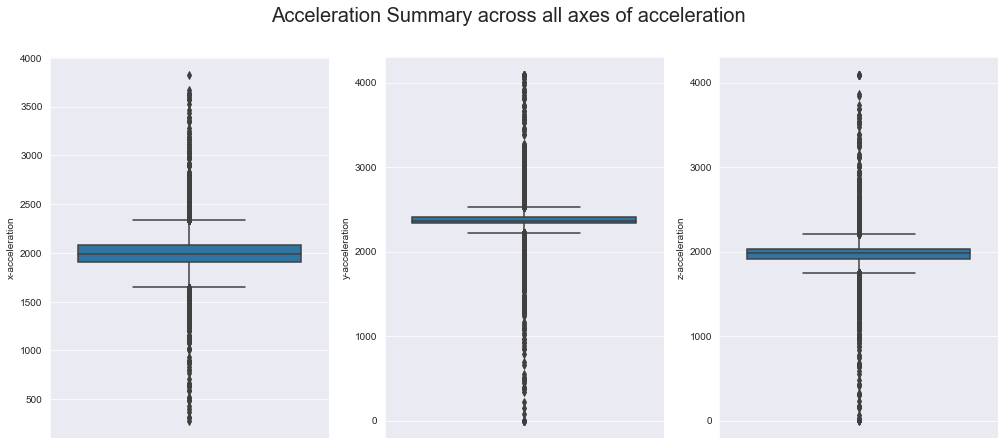

In [7]:
fig, ax = plt.subplots(1,3,figsize=(17,7))

sns.boxplot(y='x-acceleration',data=data,ax=ax[0])
sns.boxplot(y='y-acceleration',data=data ,ax=ax[1])
sns.boxplot(y='z-acceleration',data=data ,ax=ax[2])
plt.suptitle('Acceleration Summary across all axes of acceleration',fontsize=20);

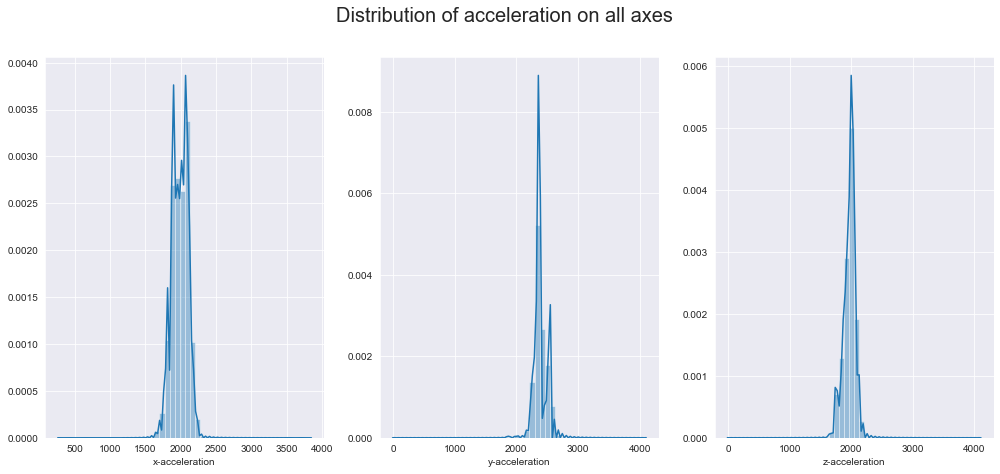

In [8]:
fig, ax = plt.subplots(1,3,figsize=(17,7))

sns.distplot(data['x-acceleration'],ax=ax[0])
sns.distplot(data['y-acceleration'],ax=ax[1])
sns.distplot(data['z-acceleration'],ax=ax[2])
plt.suptitle('Distribution of acceleration on all axes',fontsize=20);

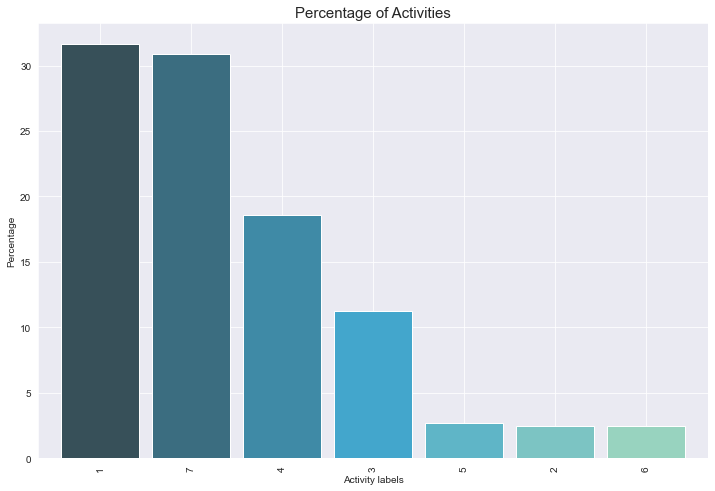

In [9]:
plt.figure(figsize=(12,8))
(data['label'].value_counts(normalize=True)*100).plot.bar(width=0.86,color=sns.color_palette('GnBu_d',n_colors=7))
plt.ylabel('Percentage')
plt.title('Percentage of Activities',fontsize=15)
plt.xlabel('Activity labels');

### Multivariate Analysis

In [10]:
#Selected only one file for better interpretation
col_names = ['sequential_no','x-acceleration','y-acceleration','z-acceleration','label']
first_df = pd.read_csv('Activity Recognition from Single Chest-Mounted Accelerometer/1.csv',names=col_names)
first_df.shape

(162501, 5)

In [11]:
def get_each_activity(df,col,i):
    return df[df[col]==i]

def plot_line(df,col1,col2):
    ax = sns.lineplot(x=col1,y=col2,data=df)

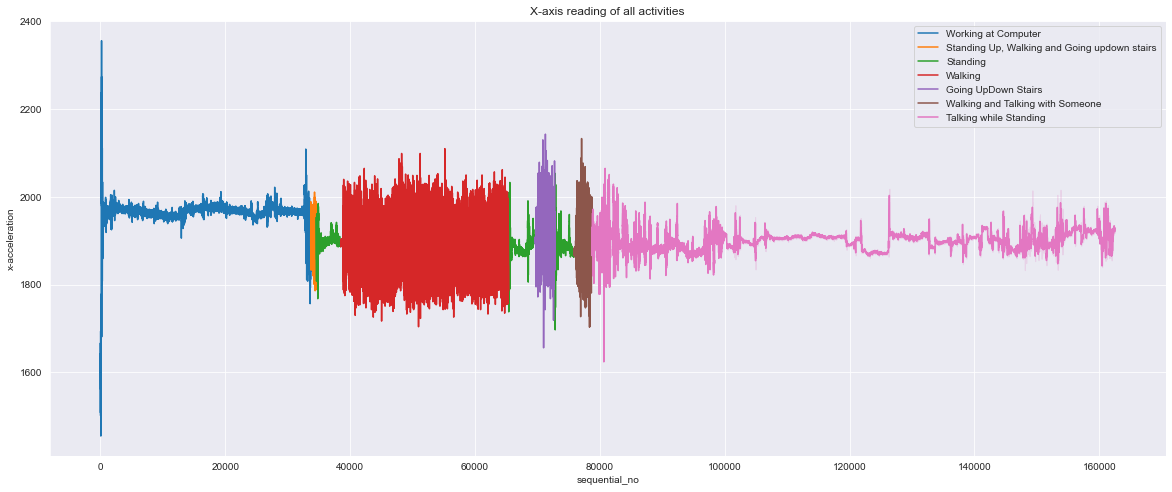

In [12]:
results = []
#First Plot
labels = ['Working at Computer','Standing Up, Walking and Going updown stairs','Standing','Walking','Going UpDown Stairs',
'Walking and Talking with Someone','Talking while Standing']

plt.figure(figsize=(20,8))    
for i in range(1,8):
    result = get_each_activity(first_df,'label',i)
    plot_line(result,'sequential_no','x-acceleration')
plt.title('X-axis reading of all activities')
plt.legend(labels=labels);

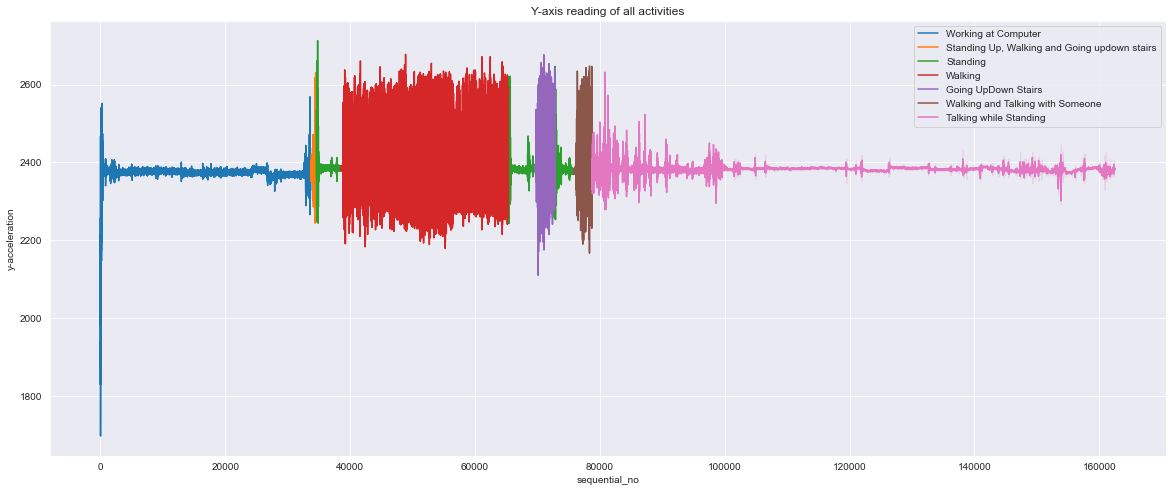

In [13]:
#Second PLot
plt.figure(figsize=(20,8))    
for i in range(1,8):
    result = get_each_activity(first_df,'label',i)
    plot_line(result,'sequential_no','y-acceleration')
plt.title('Y-axis reading of all activities')
plt.legend(labels=labels);

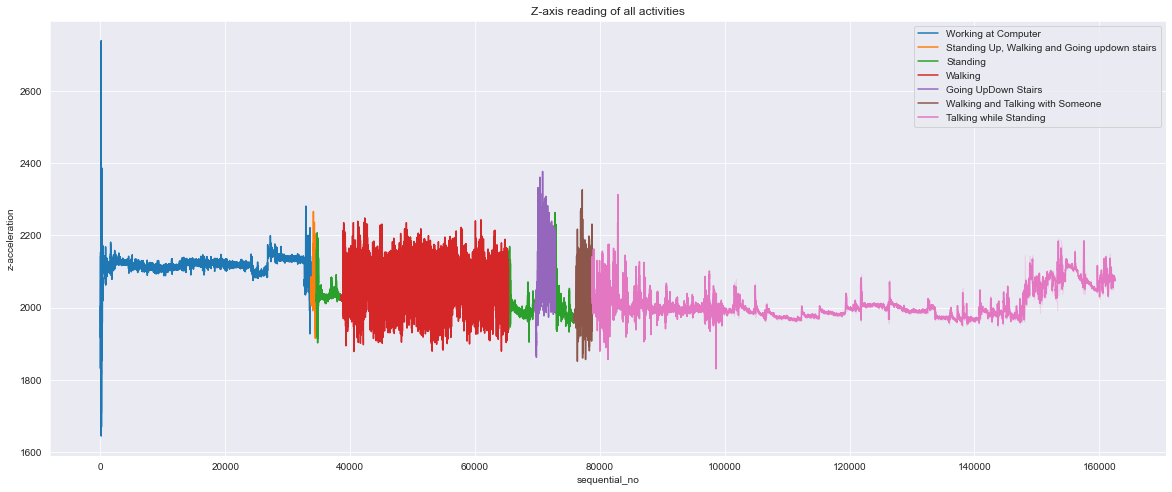

In [14]:
#Third Plot
plt.figure(figsize=(20,8))    
for i in range(1,8):
    result = get_each_activity(first_df,'label',i)
    plot_line(result,'sequential_no','z-acceleration')
plt.title('Z-axis reading of all activities')
plt.legend(labels = labels)
plt.savefig('z_axis_lineplot')

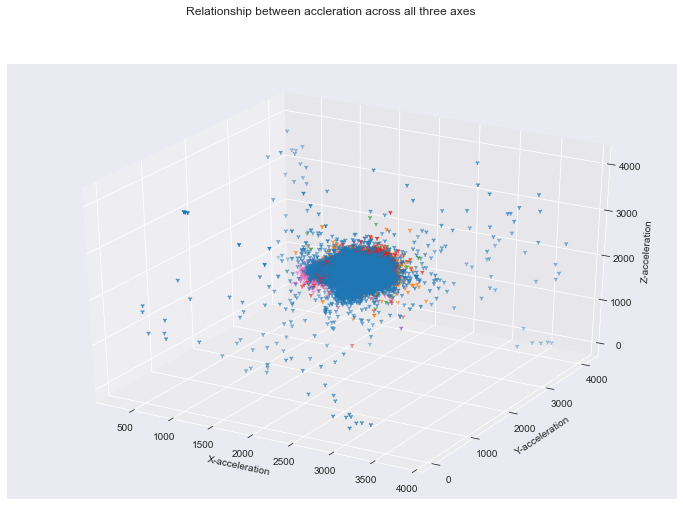

In [15]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Generate the values
x_vals = first_df['x-acceleration']
y_vals = first_df['y-acceleration']
z_vals = first_df['z-acceleration']

# Plot the values
groups = data.groupby('label')
for name, group in groups:
    
    ax.scatter(group['x-acceleration'],group['y-acceleration'],group['z-acceleration'],marker='1',label=name)
    ax.set_xlabel('X-acceleration')
    ax.set_ylabel('Y-acceleration')
    ax.set_zlabel('Z-acceleration')
plt.suptitle('Relationship between accleration across all three axes')
plt.show()

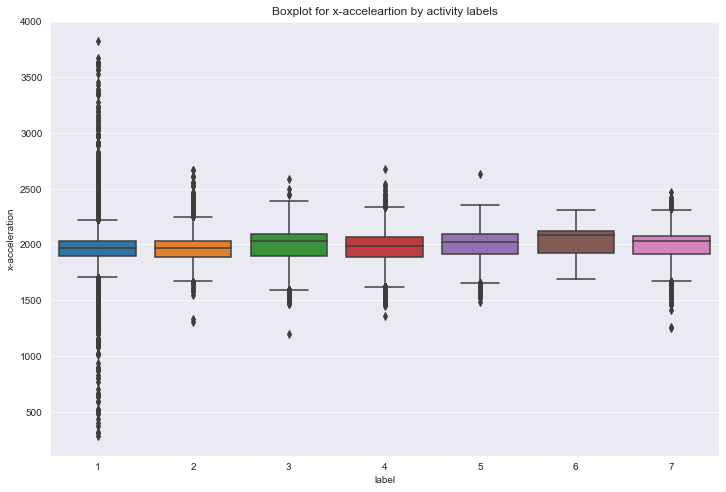

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(x=data['label'],y=data['x-acceleration'])
plt.title('Boxplot for x-acceleartion by activity labels')
plt.show()

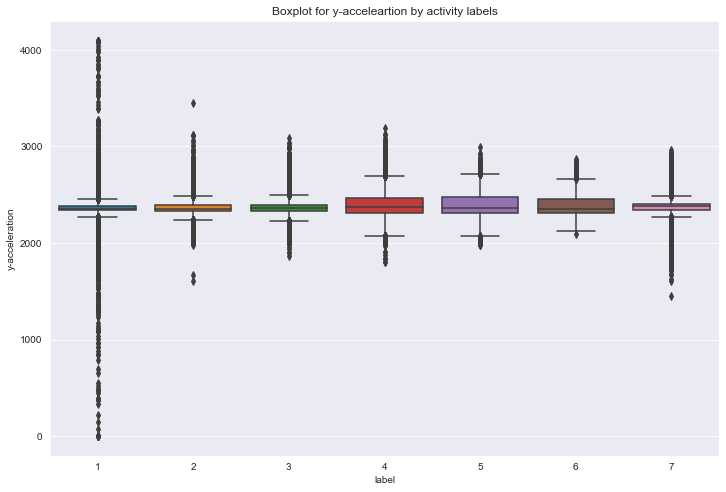

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(x=data['label'],y=data['y-acceleration'])
plt.title('Boxplot for y-acceleartion by activity labels')
plt.show()

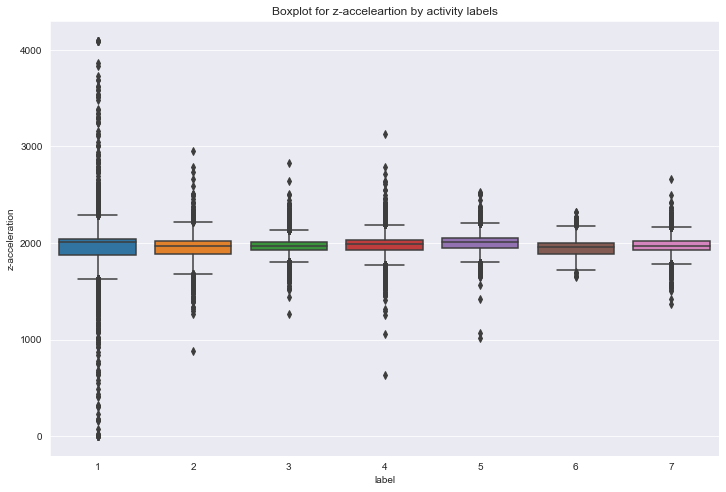

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(x=data['label'],y=data['z-acceleration'])
plt.title('Boxplot for z-acceleartion by activity labels')
plt.show()

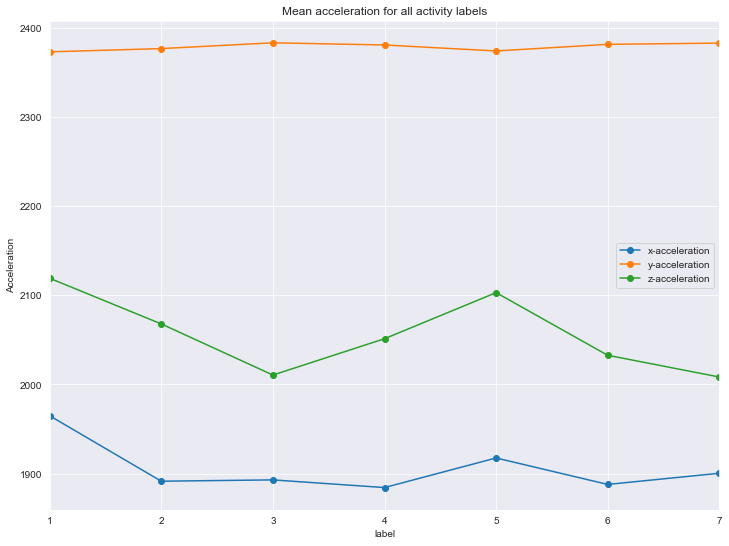

In [19]:
first_df = first_df[first_df['label']!=0]
mean_acc = first_df.groupby('label').mean()[['x-acceleration','y-acceleration','z-acceleration']]
mean_acc.plot.line(figsize=(12,9),marker='o')
plt.ylabel('Acceleration')
plt.title('Mean acceleration for all activity labels');

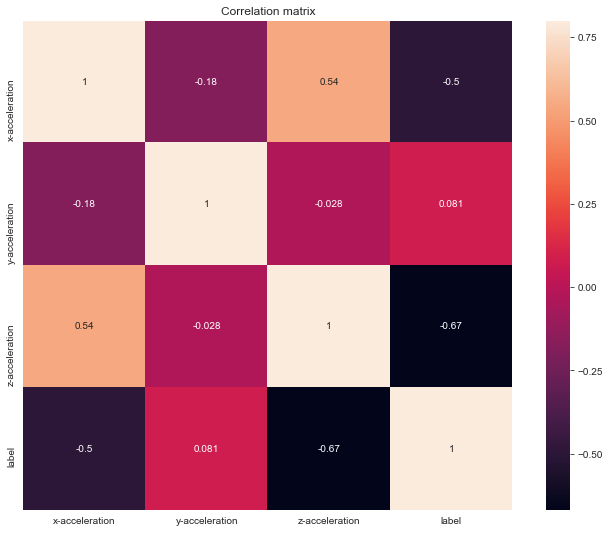

In [20]:
#correlation matrix
corr = first_df[['x-acceleration','y-acceleration','z-acceleration','label']].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8,annot=True,square=True)
plt.title('Correlation matrix');

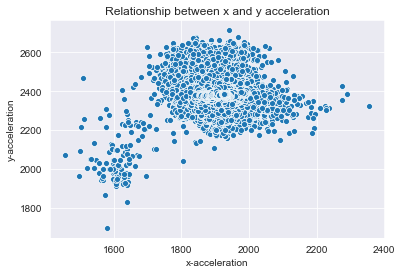

In [21]:
sns.scatterplot('x-acceleration','y-acceleration',data=first_df)
plt.title('Relationship between x and y acceleration');

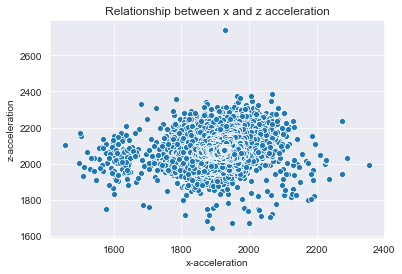

In [22]:
sns.scatterplot('x-acceleration','z-acceleration',data=first_df)
plt.title('Relationship between x and z acceleration');

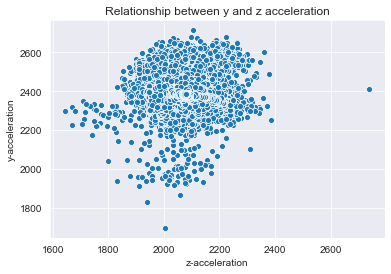

In [23]:
sns.scatterplot('z-acceleration','y-acceleration',data=first_df)
plt.title('Relationship between y and z acceleration');

## 3. Data Modeling

In [24]:
# Separate features and target
X = data.drop(['sequential_no','label'],axis=1)
y = data['label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=40)

In [25]:
tree = DecisionTreeClassifier(random_state=40)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
report = classification_report(y_test,y_pred,output_dict=True)
df = pd.DataFrame(report).transpose()
df

,f1-score,precision,recall,support
1,0.846807,0.837296,0.856538,121795.000000
2,0.224626,0.234795,0.215300,9647.000000
3,0.433171,0.419056,0.448269,43523.000000
4,0.562441,0.568998,0.556033,71271.000000
5,0.166079,0.165067,0.167104,10293.000000
6,0.217881,0.218167,0.217596,9559.000000
7,0.720172,0.731158,0.709510,118548.000000
accuracy,0.658932,0.658932,0.658932,0.658932
macro avg,0.453025,0.453505,0.452907,384636.000000
weighted avg,0.658829,0.659057,0.658932,384636.000000


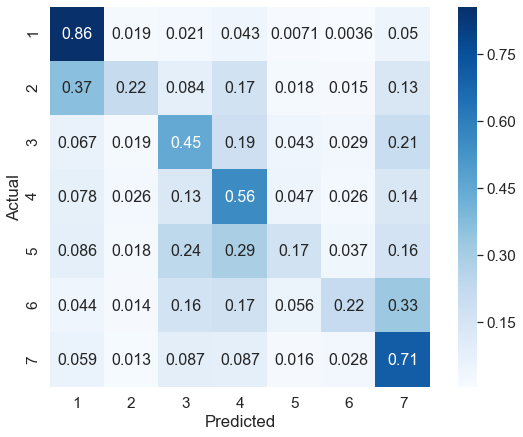

In [26]:
plot_confusion_matrix(y_test,y_pred)

In [27]:
knn = KNeighborsClassifier(13)
knn.fit(X_train,y_train)
knn_y_pred = knn.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test,knn_y_pred))
knn_report = classification_report(y_test,knn_y_pred,output_dict=True)
knn_df = pd.DataFrame(knn_report).transpose()
knn_df

Accuracy Score:  0.7450706642123982


,f1-score,precision,recall,support
1,0.886994,0.864836,0.910317,121795.000000
2,0.287269,0.530578,0.196952,9647.000000
3,0.520478,0.575263,0.475220,43523.000000
4,0.680866,0.634569,0.734450,71271.000000
5,0.183934,0.395954,0.119790,10293.000000
6,0.288723,0.479708,0.206507,9559.000000
7,0.794153,0.767194,0.823076,118548.000000
accuracy,0.745071,0.745071,0.745071,0.745071
macro avg,0.520345,0.606872,0.495187,384636.000000
weighted avg,0.729988,0.728806,0.745071,384636.000000


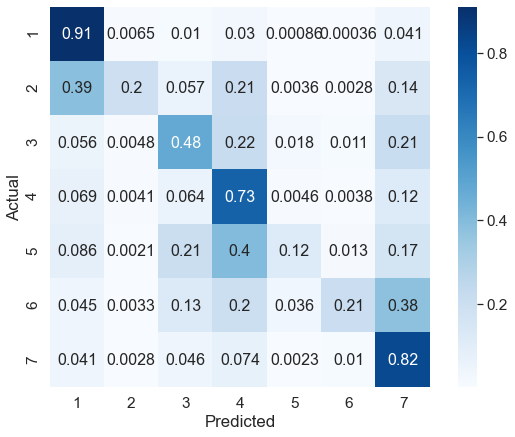

In [28]:
plot_confusion_matrix(y_test,knn_y_pred)

### Feature Engineering

In [29]:
new_data = data.copy()
new_data['corr_x_y'] = new_data['x-acceleration'].corr(new_data['y-acceleration'])
new_data['corr_x_z'] = new_data['x-acceleration'].corr(new_data['z-acceleration'])
new_data['corr_y_z'] = new_data['y-acceleration'].corr(new_data['z-acceleration'])
new_data['mag'] = np.sqrt(np.square(new_data['x-acceleration']) + np.square(new_data['y-acceleration']))
new_data['mag'] = np.sqrt(np.square(new_data['mag'])+np.square(new_data['z-acceleration']))
new_X = new_data.drop(['sequential_no','label'],axis=1)
new_y = new_data['label']
knn = KNeighborsClassifier(13)
new_X_train,new_X_test,new_y_train,new_y_test = train_test_split(new_X,new_y,test_size=0.2,random_state=40)
knn.fit(new_X_train,new_y_train)
new_knn_y_pred = knn.predict(new_X_test)
print('Accuracy Score: ', accuracy_score(new_y_test,new_knn_y_pred))
new_knn_report = classification_report(new_y_test,new_knn_y_pred,output_dict=True)
new_knn_df = pd.DataFrame(new_knn_report).transpose()
new_knn_df

Accuracy Score:  0.745424245260454


,f1-score,precision,recall,support
1,0.887350,0.865121,0.910752,121795.000000
2,0.289864,0.536244,0.198611,9647.000000
3,0.520299,0.576076,0.474370,43523.000000
4,0.680852,0.634346,0.734717,71271.000000
5,0.185265,0.399807,0.120567,10293.000000
6,0.286950,0.478963,0.204833,9559.000000
7,0.794645,0.767430,0.823860,118548.000000
accuracy,0.745424,0.745424,0.745424,0.745424
macro avg,0.520746,0.608284,0.495387,384636.000000
weighted avg,0.730287,0.729247,0.745424,384636.000000


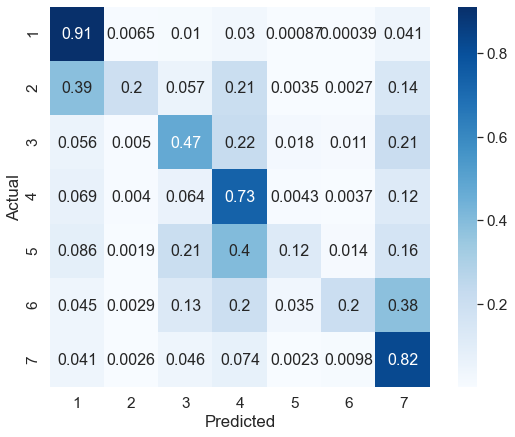

In [30]:
plot_confusion_matrix(new_y_test,new_knn_y_pred)

### Hyperparameter Tuning

In [31]:
knn = KNeighborsClassifier(n_neighbors=13,p=4)
knn.fit(new_X_train,new_y_train)
pred = knn.predict(new_X_test)
print('Accuracy Score: ', accuracy_score(new_y_test,pred))
report = classification_report(new_y_test,pred,output_dict=True)
df = pd.DataFrame(report).transpose()
df

Accuracy Score:  0.7452214561299514


,f1-score,precision,recall,support
1,0.887235,0.865035,0.910604,121795.000000
2,0.289864,0.536244,0.198611,9647.000000
3,0.519328,0.575424,0.473198,43523.000000
4,0.680867,0.634267,0.734857,71271.000000
5,0.183785,0.395633,0.119693,10293.000000
6,0.288436,0.481527,0.205879,9559.000000
7,0.794414,0.767146,0.823692,118548.000000
accuracy,0.745221,0.745221,0.745221,0.745221
macro avg,0.520561,0.607897,0.495219,384636.000000
weighted avg,0.730069,0.728996,0.745221,384636.000000


### K-Fold Cross Validation

In [32]:
cross_validation(new_X,new_y)

Using Stratified K-Fold Cross Validation

1 of kfold 5
accuracy_score 0.745723229234913

2 of kfold 5
accuracy_score 0.7463029981592987

3 of kfold 5
accuracy_score 0.7469341063605756

4 of kfold 5
accuracy_score 0.7470978980072016

5 of kfold 5
accuracy_score 0.7457459669556853
